In [30]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
# from scipy.stats import linregress

In [31]:
data_df = pd.read_csv("Resources\What is The Best Performing Marvel Movie PUBLIC DATA - Marvel Movies.csv")
data_df.head()

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...


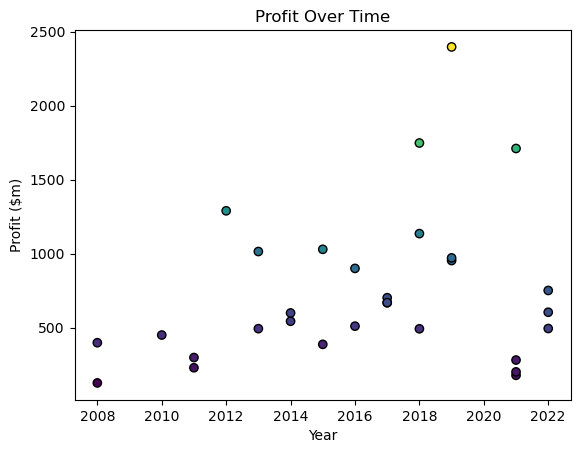

In [32]:
profit = data_df["worldwide gross ($m)"] - data_df["budget"]

# profit_slope, profit_int, profit_r, profit_p, profit_err = linregress(data_df["year"], profit)
# profit_fit = profit_slope * data_df["year"] + profit_int
# plt.plot(data_df["year"], profit_fit, color="red")

plt.scatter(data_df["year"], profit, c=data_df["worldwide gross ($m)"], edgecolors="black")
plt.title("Profit Over Time")
plt.xlabel("Year")
plt.ylabel("Profit ($m)")
plt.savefig("Images/Profit Over Time.png")
plt.show()

In [33]:
data_df["audience % score"] = data_df["audience % score"].str.rstrip('%').astype(float)
data_df["critics % score"] = data_df["critics % score"].str.rstrip('%').astype(float)

average_df = data_df.groupby(["year"]).mean()
average_df

C:\Users\cschuttler\AppData\Local\Temp\ipykernel_20312\3217992933.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_df = data_df.groupby(["year"]).mean()


,worldwide gross ($m),critics % score,audience % score,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),% gross from opening weekend
year,,,,,,,,,
2008,425.000000,80.500000,80.000000,161.750000,226.000000,198.000000,78.500000,36.650000,36.600000
2010,621.000000,71.000000,71.000000,170.000000,312.000000,308.000000,128.000000,52.000000,41.000000
2011,409.500000,78.000000,75.500000,145.000000,178.500000,230.500000,65.000000,29.500000,36.550000
2012,1515.000000,91.000000,91.000000,225.000000,623.000000,891.000000,207.000000,103.000000,33.300000
2013,929.500000,72.500000,76.500000,175.000000,307.000000,622.000000,129.500000,54.500000,42.050000
2014,742.000000,91.000000,92.000000,170.000000,296.000000,445.500000,94.500000,41.550000,39.950000
2015,956.500000,79.500000,83.500000,247.500000,319.500000,637.000000,124.000000,50.500000,36.750000
2016,913.500000,89.500000,87.500000,207.500000,320.000000,593.000000,132.000000,57.750000,40.250000
2017,865.666667,90.000000,87.000000,185.000000,346.000000,519.333333,128.333333,55.333333,37.200000


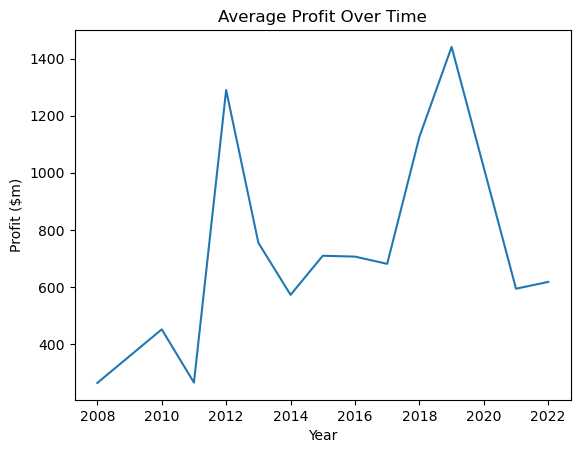

In [34]:
average_profits = average_df["worldwide gross ($m)"] - average_df["budget"]
plt.plot(average_profits)
plt.title("Average Profit Over Time")
plt.xlabel("Year")
plt.ylabel("Profit ($m)")
plt.savefig("Images/Average Profit Over Time.png")
plt.show()

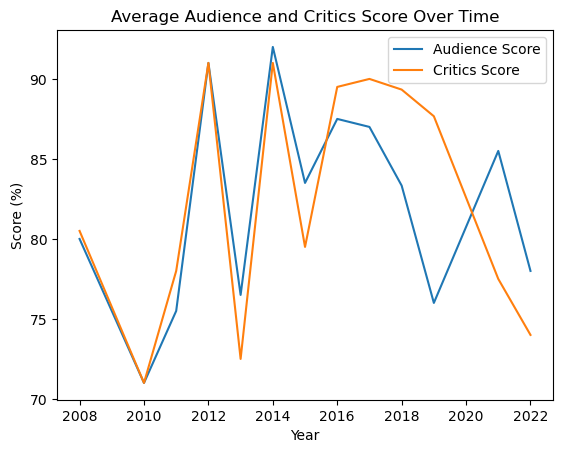

In [35]:
average_audience = average_df["audience % score"]
average_critics = average_df["critics % score"]

plt.plot(average_audience, label="Audience Score")
plt.plot(average_critics, label="Critics Score")
plt.title("Average Audience and Critics Score Over Time")
plt.xlabel("Year")
plt.ylabel("Score (%)")
plt.legend()
plt.savefig("Images/Score Over Time.png")
plt.show()